In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [32]:
from olistdash.data import Olist
data = Olist().get_data()

# DF

In [111]:
# df = pd.read_csv('../raw_data/csv/df.csv')
df = data['order_payments'][['order_id','payment_value']].merge(data['orders'][['order_id','order_purchase_timestamp']], on='order_id', how='outer')

In [112]:
df

,order_id,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,107.78,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,128.45,2018-05-21 13:59:17
...,...,...,...
103882,7b905861d7c825891d6347454ea7863f,96.80,2017-08-18 09:45:35
103883,32609bbb3dd69b3c066a6860554a77bf,47.77,2017-11-18 17:27:14
103884,b8b61059626efa996a60be9bb9320e10,369.54,2018-08-07 23:26:13
103885,28bbae6599b09d39ca406b747b6632b1,191.58,2017-12-05 08:18:35


In [116]:
# df.to_csv('../raw_data/csv/df.csv',index=False)

In [117]:
pd.read_csv('../raw_data/csv/df.csv')

,order_id,payment_value,order_purchase_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,99.33,2018-04-25 22:01:49
1,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06-26 11:01:38
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71,2017-12-12 11:19:55
3,ba78997921bbcdc1373bb41e913ab953,107.78,2017-12-06 12:04:06
4,42fdf880ba16b47b59251dd489d4441a,128.45,2018-05-21 13:59:17
...,...,...,...
103882,7b905861d7c825891d6347454ea7863f,96.80,2017-08-18 09:45:35
103883,32609bbb3dd69b3c066a6860554a77bf,47.77,2017-11-18 17:27:14
103884,b8b61059626efa996a60be9bb9320e10,369.54,2018-08-07 23:26:13
103885,28bbae6599b09d39ca406b747b6632b1,191.58,2017-12-05 08:18:35


In [25]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# df = df[(df['order_purchase_timestamp'] >= '2017-01-01') & (df['order_purchase_timestamp'] <= '2018-07-31' )]
df = df[(df['order_purchase_timestamp'] >= '2017-01-01')]

df = df.set_index('order_purchase_timestamp').sort_index()

df_daily = pd.DataFrame(df.resample('D')['payment_value'].sum()).reset_index()

df_monthly = pd.DataFrame(df.resample('M')['payment_value'].sum()).reset_index()

# REVIEWS

In [71]:
reviews = data['order_reviews'].copy()
# reviews = pd.read_csv('../raw_data/csv/reviews.csv')

In [73]:
reviews.to_csv('../raw_data/csv/reviews.csv')

In [38]:
# handle datetime
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
review_creation_date,,,,,,
2018-01-18,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 21:46:59
2018-03-10,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-11 03:05:13
2018-02-17,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-18 14:36:24
2017-04-21,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
2018-03-01,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53
...,...,...,...,...,...,...
2017-12-09,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-11 20:06:42
2018-03-22,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-23 09:10:43
2018-07-01,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-02 12:59:13


In [86]:
# reviews.to_csv('../raw_data/csv/reviews.csv')

In [87]:
reviews = pd.read_csv('../raw_data/csv/reviews.csv')
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)
reviews

,Unnamed: 0,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
review_creation_date,,,,,,,
2018-01-18,0.0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 21:46:59
2018-03-10,1.0,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-11 03:05:13
2018-02-17,2.0,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-18 14:36:24
2017-04-21,3.0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
2018-03-01,4.0,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
2017-12-09,99995.0,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5.0,NaN,NaN,2017-12-11 20:06:42
2018-03-22,99996.0,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5.0,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-23 09:10:43
2018-07-01,99997.0,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4.0,NaN,NaN,2018-07-02 12:59:13


# ORDERS

In [100]:
orders = data['orders'].copy()

In [103]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [75]:
# orders.to_csv('../raw_data/csv/orders.csv',index=False)

In [95]:
orders=pd.read_csv('../raw_data/csv/orders.csv')

In [104]:
orders = orders.query("order_status=='delivered'").reset_index()
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
# orders = orders[(orders['order_purchase_timestamp'] >= '2017-01-01') & (orders['order_purchase_timestamp'] <= '2018-07-31' )]
orders = orders[(orders['order_purchase_timestamp'] >= '2017-01-01')]
orders['delay_vs_expected'] = (orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date']) / np.timedelta64(24, 'h')
def handle_delay(x):
    if x < 0:
        return abs(x)
    else:
        return 0
    
orders.loc[:,'delay_vs_expected'] = orders['delay_vs_expected'].apply(handle_delay)
orders['wait_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']) / np.timedelta64(24, 'h')
orders=orders.drop(columns=['index'])

In [105]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,2.873877
...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.0,8.218009
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,22.193727
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,24.859421
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,17.086424


In [57]:
# orders.to_csv('../raw_data/csv/orders.csv',index=False)

In [61]:
orders = pd.read_csv('../raw_data/csv/orders.csv')

In [62]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,0.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,2.873877
...,...,...,...,...,...,...,...,...,...,...
96206,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0.0,8.218009
96207,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0.0,22.193727
96208,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0.0,24.859421
96209,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,0.0,17.086424


In [106]:
reviews

,Unnamed: 0,review_id,order_id,review_score,review_comment_title,review_comment_message,review_answer_timestamp
review_creation_date,,,,,,,
2018-01-18,0.0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 21:46:59
2018-03-10,1.0,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-11 03:05:13
2018-02-17,2.0,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-18 14:36:24
2017-04-21,3.0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 22:02:06
2018-03-01,4.0,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
2017-12-09,99995.0,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5.0,NaN,NaN,2017-12-11 20:06:42
2018-03-22,99996.0,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5.0,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-23 09:10:43
2018-07-01,99997.0,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4.0,NaN,NaN,2018-07-02 12:59:13


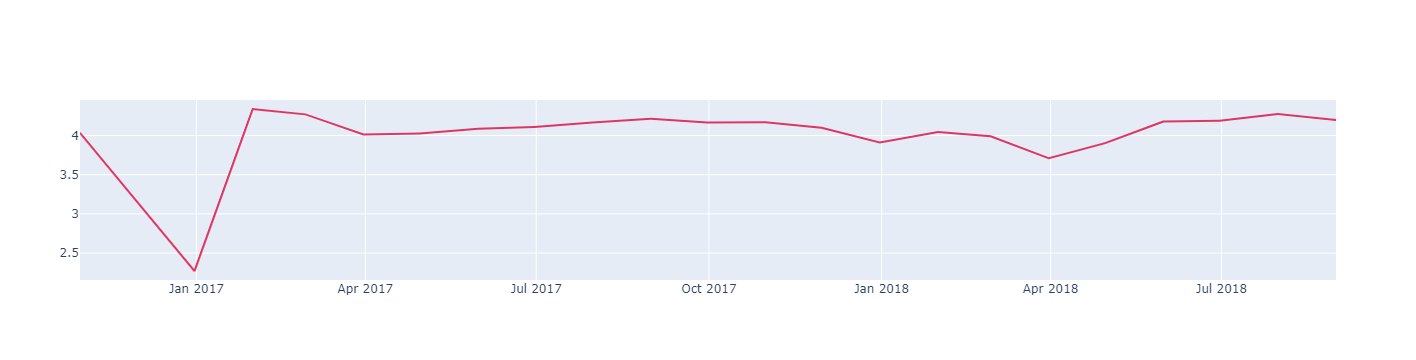

In [92]:
fig = go.Figure(
    [
        go.Scatter(
            x=reviews.resample('M').agg({'review_score':'mean'}).reset_index()['review_creation_date'],
            y=reviews.resample('M').agg({'review_score':'mean'}).reset_index()['review_score'],
            line=dict(color = "#DE3562"),
            name="mean review score",
        )
    ]
    )
fig.show()

In [107]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delay_vs_expected,wait_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.0,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0.0,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.0,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0.0,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0.0,2.873877
...,...,...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,0.0,8.218009
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,0.0,22.193727
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,0.0,24.859421
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,0.0,17.086424


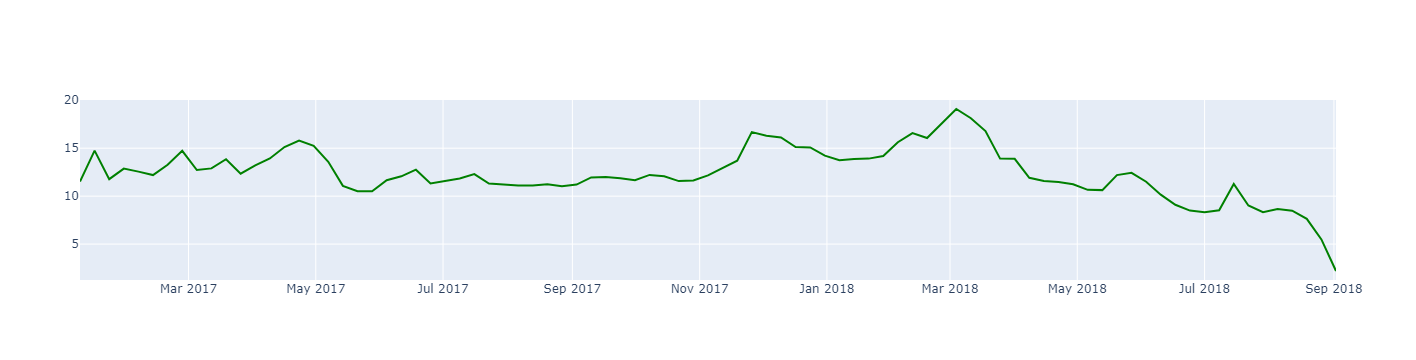

In [108]:
orders.set_index('order_purchase_timestamp',inplace=True)
fig = go.Figure(
    [
        go.Scatter(
            x=orders.resample('W')[['delay_vs_expected', 'wait_time']].mean().reset_index()['order_purchase_timestamp'],
            y=orders.resample('W')[['delay_vs_expected', 'wait_time']].mean().reset_index()['wait_time'],
            line={"color": "green"},
            name="Wait Time",
        )
    ]
    )
fig.show()